# Diagram Collection for visualizing METEOSTAT data

### Import meteostat & other libraries

In [1]:
# Import Meteostat library and dependencies
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly, Stations
import meteostat as mts
import geopandas
import pandas as pd
from windrose import WindroseAxes
import numpy as np

### Access metadata from meteostat

To check the metadata of the meteostat library.
More infos: https://dev.meteostat.net/python/stations.html#data-structure

In [26]:
help(mts)

Help on package meteostat:

NAME
    meteostat

DESCRIPTION
    █▀▄▀█ █▀▀ ▀█▀ █▀▀ █▀█ █▀ ▀█▀ ▄▀█ ▀█▀
    █░▀░█ ██▄ ░█░ ██▄ █▄█ ▄█ ░█░ █▀█ ░█░
    
    A Python library for accessing open weather and climate data
    
    Meteorological data provided by Meteostat (https://dev.meteostat.net)
    under the terms of the Creative Commons Attribution-NonCommercial
    4.0 International Public License.
    
    The code is licensed under the MIT license.

PACKAGE CONTENTS
    core (package)
    enumerations (package)
    interface (package)
    series (package)
    units
    utilities (package)

DATA
    __appname__ = 'meteostat'

VERSION
    1.6.8

FILE
    c:\users\isabe\anaconda3\envs\climate_data1\lib\site-packages\meteostat\__init__.py




### Test diagram from meteostat

This section shows an example diagram from meteostat, including how to fetch and visualize weather data using the *meteostat* library.

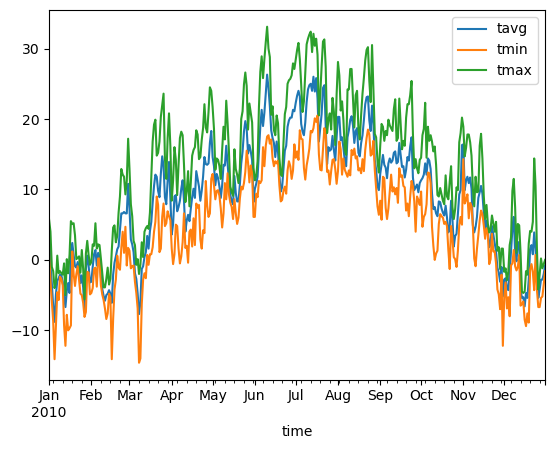

In [13]:
# Set the time period
start = datetime(2010, 1, 1)
end = datetime(2010, 12, 31)

# Create a Point for Salzburg / define the location
location = Point(47.7833, 13.05)

# Get daily data (in this example for 2018)
data = Daily(location, start, end)
data = data.fetch()

# Plot the data as a line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()


### Fetching coordinates/infos about weather stations near a location

Look for the coordinates of the weather station by fetching data about the nearest station of given coordinates.

In [197]:
# Get nearby weather stations. You can also fetch multiple nearby stations by changing the current parameter of "1" to "n-stations"
def get_nearby_stations(lat, lon):
    stations = Stations()
    stations = stations.nearby(lat, lon)
    stations = stations.fetch(1)
    return stations

In [198]:
# Example with lat/long coordinates as necessary parameters
get_nearby_stations(46.9, 13.2)

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
11210,Mallnitz,AT,KA,11210,<NA>,46.9833,13.1833,1185.0,Europe/Vienna,NaT,NaT,NaT,NaT,NaT,NaT,9348.902207


### Line charts (of a weather station for a certain time frame)

For creating the following diagrams:
- average temperature
- daily wind speed

#### Line diagram 1: average temperature

Use the coordinates from f.e. Salzburg/Freisaal to generate the diagram.
Displays average temperature. The commented elements are only needed if parameters have not been defined previously.

In [14]:
# Set the time period
start = datetime(2023, 6, 1) #Specifies the beginning of the time period
end = datetime(2023, 7, 1) #Specifies the end of the time period

# Create a Point/location for Salzburg, using the coordinates of the weather station
location = Point(47.7833, 13.05)

# Get daily data (f.e. for 2023)
data = Daily(location, start, end) #A Point object is created using latitude  and longitude
data = data.fetch() #retrieve daily weather data for the specified location and time period

# Line chart displaying average temperature (as a function)
def avg_temp_line(data, y, title):
    data.plot(y=['tavg'])
    plt.title('Average Temperature')
    plt.show()

Parameters:

- **data (DataFrame)**: A Pandas DataFrame containing the weather data to be plotted. 
- **y (str)**: The average temperature in the DataFrame that gets plotted (as *tavg*)
- **title (str)**: The title of the plot as a string.

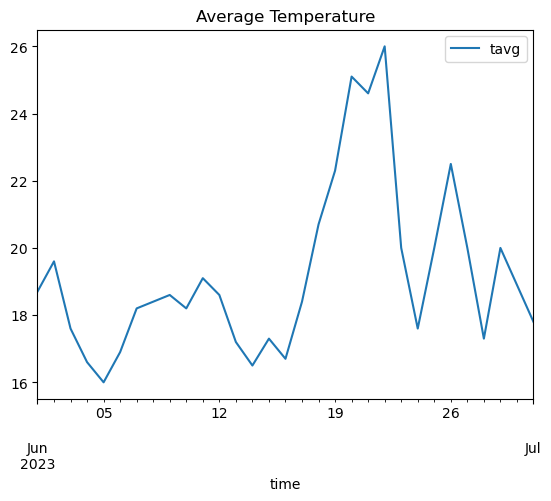

In [15]:
avg_temp_line(data, 'tavg', title='')

#### Line diagram 2: daily wind speed

In [203]:
# Line chart displaying wind speed
def wind_speed_line(data, y, title):
    data.plot(y=['wspd'])
    plt.title('Wind Speed')
    plt.show()

Parameters:

- **data (DataFrame)**: A Pandas DataFrame containing the weather data to be plotted.
- **y (str)**: The Windspeed in the DataFrame that gets plotted ( as *wspd*).
- **title (str)**: The title of the plot.


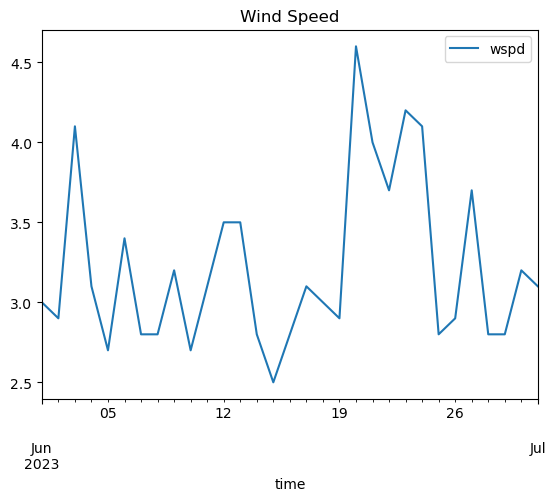

In [215]:
wind_speed_line(data,'wspd', title='')

### Precipitation bar charts (of a weather station for a certain time frame)

For creating the following diagrams:

- precipitation bar chart 1 (with first version of visualization)
- precipitation bar chart 2 (with second version of visualization)

#### Precipitation bar chart - version 1

Version 1 of the precipitation bar chart includes:
- a title of the diagram
- shortened and rotated labels of the dates (x-Axis)
- labelling the amount of Precipitation (y-Axis)
- color formatting and size adaption of the bars

In [19]:
# Bar chart for precipitation over two months per day, incl. title

def precipitation_bar_1(data, title):
    data.plot(kind='bar', y='prcp', figsize=(10, 6), color='skyblue')
    plt.title('Precipitation')
    plt.xlabel('Date')
    plt.ylabel('Precipitation (mm)')
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: data.index[int(x)].strftime('%Y-%m-%d')))
    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    plt.show()

Parameters:

- **data (DataFrame)**: A Pandas DataFrame containing the precipitation data to be plotted. 
- **title (str)**: The title of the plot as a string.

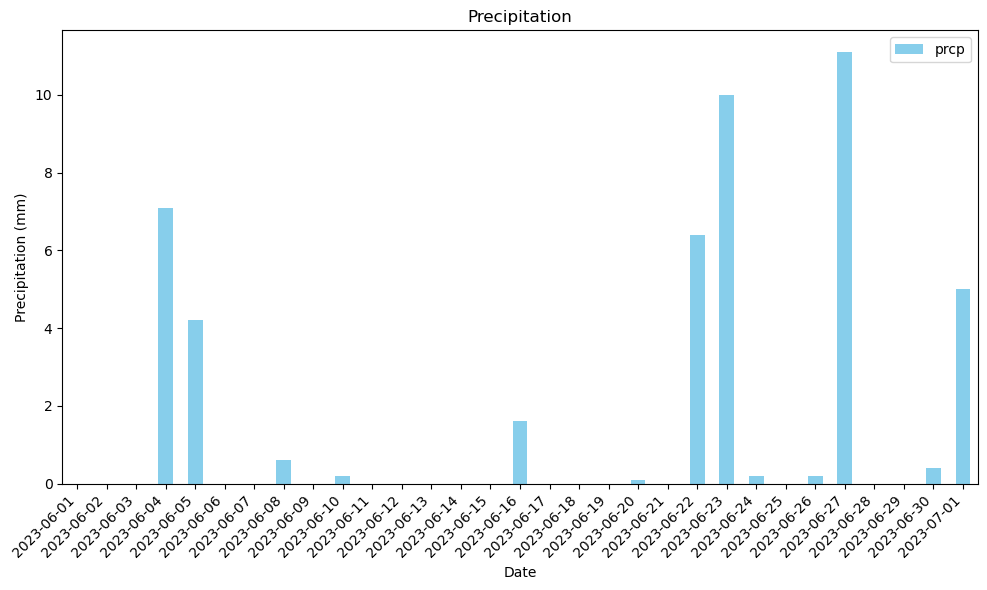

In [20]:
precipitation_bar_1(data, title='')

#### Precipitation bar chart - version 2

Version 2 of the precipitation bar chart includes:
- shortened date labels (x-axis)
- changed color of bars and title
- larger diagram title 

In [22]:
# Define the location and time period
#location = Point(47.81, 13.04, 424)  # Coordinates for Salzburg, Austria
#start = datetime.datetime(2024, 3, 1)
#end = datetime.datetime(2024, 3, 31)

# Fetch daily weather data
#data = Daily(location, start, end)
#data = data.fetch()

def precipitation_bar_2(data, title):
    data['prcp'].plot(kind='bar', figsize=(10, 5), color='steelblue')
    title_font = {'size': 20, 'color': '#23457d', 'weight': 'bold'}
    plt.title('Precipitation', fontdict=title_font)
    plt.xlabel('Date')
    plt.ylabel('Precipitation [mm]')
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=50, ha='right')
    # Format x-axis labels and other formatting
    formatter = FuncFormatter(lambda x, _: data.index[int(x)].strftime('%m-%d'))
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.tight_layout() 
    plt.show()

Parameters:

- **data (DataFrame)**: A Pandas DataFrame containing the precipitation data to be plotted.
- **title (str)**: The title of the plot as a string.

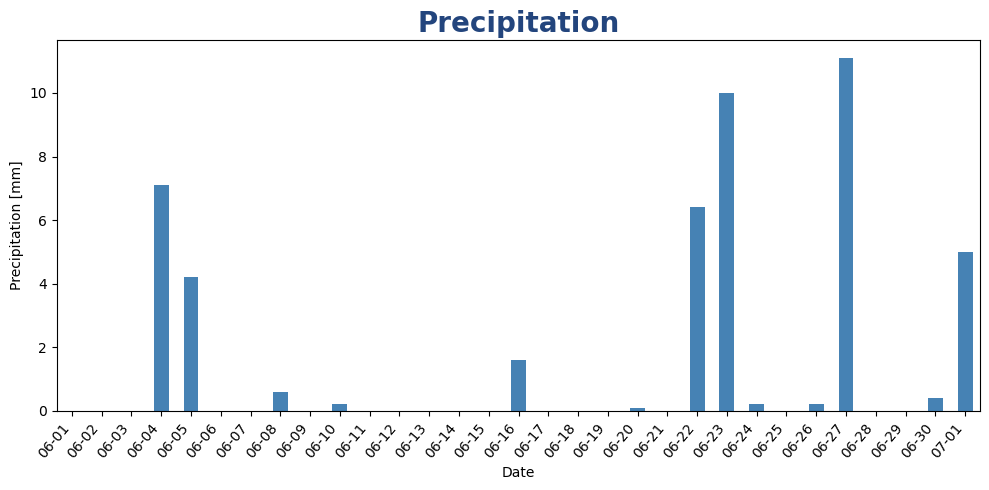

In [23]:
precipitation_bar_2(data, title='')

### Histogram of wind speed distribution

Displays the frequency of wind speeds in form of a histogram.
Inlcuded:
- diagram title
- formatted histogram style
- number of histogram bins (default: 20)

In [234]:
# If no previous location and time frame have been defined
#location = Point(47.81, 13.04, 424)  
#start = datetime.datetime(2024, 3, 1)
#end = datetime.datetime(2024, 3, 31)

#data = Daily(location, start, end)
#data = data.fetch()

# wind speed data
#wind_speed = data['wspd']

def wind_speed_histogram(data, title):
    wind_speed = data['wspd']
    plt.figure(figsize=(10, 6))
    plt.hist(wind_speed.dropna(), bins=20, color='crimson', edgecolor='white')
    plt.title('Wind Speed Distribution in Salzburg (March 2024)')
    plt.xlabel('Wind Speed (km/h)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Parameters:

- **data (DataFrame)**: A Pandas DataFrame containing the precipitation data to be plotted.
- **title (str)**: The title of the plot as a string.

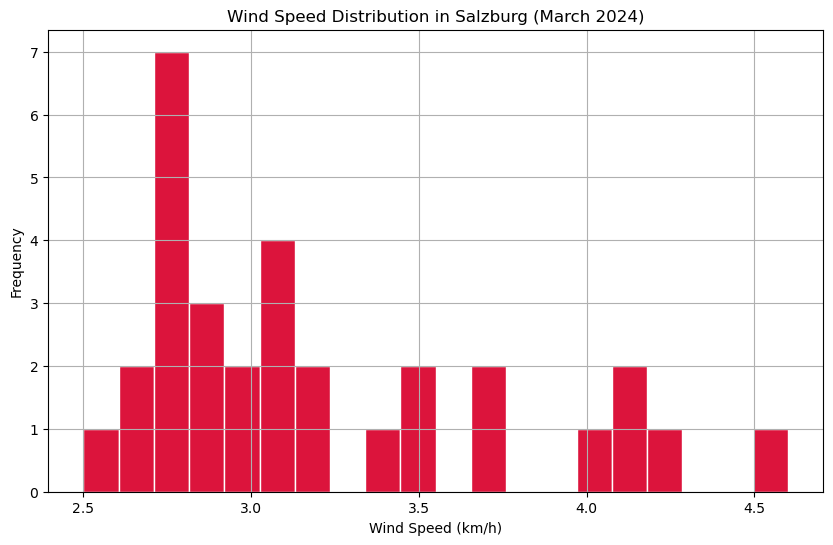

In [235]:
wind_speed_histogram(data, title='')

### Spider Charts (wind speed and wind direction)

For creating spider charts that depict wind speed and wind direction. The following options are included
- Spider chart - version 1 (by using the visualization created with the numpy library)
- Spider chart - version 2 (by using the visualization created with the windrose library)

#### Spider chart - version 1 (via numpy libary)

Display wind speed and wind direction in form of a spider chart for a certain weather station and time frame.

In [39]:
# Define the location and time period (only necessary if not previously defined)
location = Point(47.81, 13.04) #lat and long of the point can be changed to any location of a weatherstation
start = datetime(2024, 3, 1) #start of the data period can be modified.
end = datetime(2024, 3, 31)#end of the data period can be modified.


def wind_spider_chart1(lat, lon, start_date, end_date, title):

    location = Point(lat, lon)
    data = Daily(location, start, end)
    data = data.fetch()
    # Average wind speed per day
    data_daily = data.resample('D').mean()

    # Prepare data for the spider chart
    num_days = len(data_daily)
    angles = np.linspace(0, 2 * np.pi, num_days, endpoint=False).tolist()
    angles += angles[:1]

    wind_speeds = data_daily['wspd'].tolist()
    wind_speeds += wind_speeds[:1]

    # Plot spider chart (using polar plot)
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    ax.plot(angles, wind_speeds, color='red', linewidth=2, linestyle='solid')
    ax.fill(angles, wind_speeds, color='red', alpha=0.5)

    # Ensure that the number of ticks and labels match
    ax.set_xticks(np.linspace(0, 2 * np.pi, num=8, endpoint=False))
    ax.set_xticklabels(['0°', '45°', '90°', '135°', '180°', '225°', '270°', '315°'], fontsize=12, rotation=0.9, ha='right')
    ax.set_theta_zero_location("N")

    #title of the diagram can be modified here
    ax.set_title('Average Wind Speed in Salzburg (March 2024)', color='crimson', weight='bold', fontfamily='sans-serif', fontsize='22')

    plt.show()

Parameters:
- **lat (47.81)**: Latitude of the location & **lon (13.04)**: Longitude of the location
- **start_date ('2024-03-01')**: Start date of the data period.
- **end_date ('2024-03-31')**: End date of the data period.
- **title (Average Wind Speed in Salzburg (March 2024))**: The title for the spider chart.

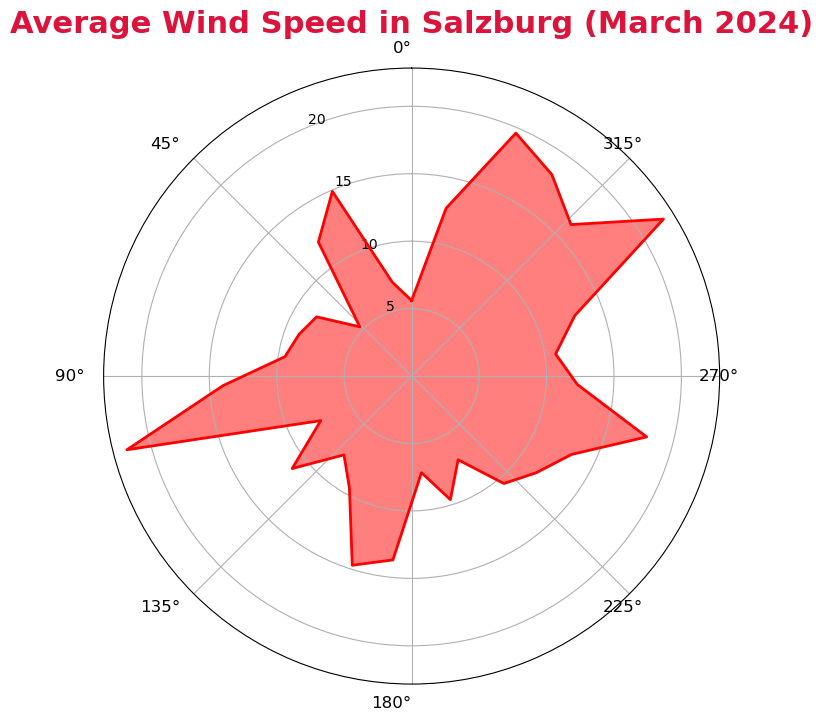

In [42]:
wind_spider_chart1(47.81, 13.04, start, end, title ='')

#### Spider chart - version 2 (via windrose library)

In [73]:
def wind_spider_chart2(data, bins, title):
    
    # Extract wind direction and wind speed data
    wind_dir = data['wdir']
    wind_speed = data['wspd']

    # Set windrose diagram and define axes
    fig = plt.figure(figsize=(7, 7))
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(wind_dir.dropna(), wind_speed.dropna(), normed=True, bins=bins, opening=0.7, edgecolor='black')

    # Style windrose diagram (spider chart)
    ax.set_legend(loc='best', title='Wind Speed (km/h)') #title of the legend can me modified
    ax.set_title('Wind speed and direction - Salzburg (March 2024)', fontsize=16, ) #title of the spider chart can be modified
    

Parameters:

- **data (DataFrame)**: A Pandas DataFrame containing the wind speed and wind direction data.
- **number of bins (bins=6)**: Amount of bins that are used for displaying wind speed
- **title (Wind Speed and direction - Salzburg (March 2024))**: The title for the spider chart.

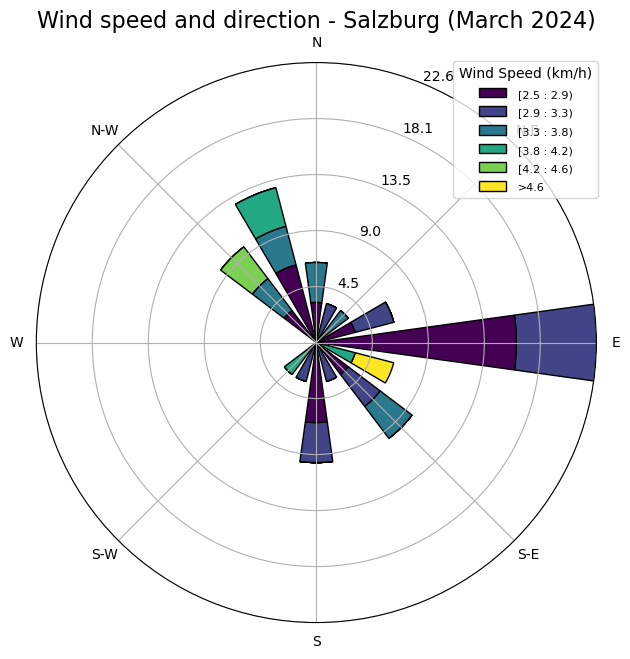

In [74]:
wind_spider_chart2(data, bins=6, title='')

### Pie chart of rain intensity days (for a certain weather station and time frame)

For creating a pie chart of rain intensity, grouped into three categories that are defined by the amount of rainfall per day.

In [83]:
# Fetch daily weather data and define start and end date, if not executed earlier.
#data = Daily(location, start, end)
#data = data.fetch()
#start = datetime(2024, 3, 1)
#end = datetime(2023, 3, 30)

def rain_intensity_pie_chart(data, title):
    # Defining rainy days
    non_rainy_days = data[data['prcp'] == 0].shape[0]
    medium_rainy_days = data[(data['prcp'] > 0) & (data['prcp'] <= 5)].shape[0]
    heavy_rain_days = data[(data['prcp'] > 5) & (data['prcp'] <= 999)].shape[0]

    labels = ['Non-Rainy Days (enjoy the weather)', 'Medium Rain Days (bring an umbrella)', 'Heavy Rain Days (dress like a fisherman)']
    sizes = [non_rainy_days, medium_rainy_days, heavy_rain_days]

    explode = (0, 0, 0.1)  

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, explode=explode,
           colors=['#d1dbe0', '#8cbeed', '#22527d'], startangle=90, autopct='%1.1f%%', shadow={'ox': -0.03, 'edgecolor': '#333a52', 'shade': 0.6})
    ax.set_title('Rain Intensity in Salzburg (March 2024)', fontsize=16, fontfamily="Verdana")
    plt.show()

Parameters:
- **data (DataFrame)**: A Pandas DataFrame containing the precipitation data to be plotted.
- **title (str)**: The title of the plot as a string.

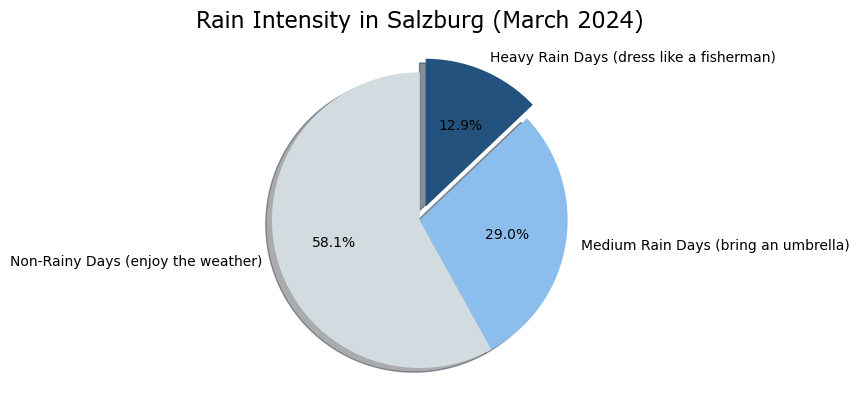

In [84]:
rain_intensity_pie_chart(data, title='')

### Addendum: checking current data

In [27]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-06-01,18.7,10.3,25.9,0.0,NaN,14.0,3.0,13.0,1015.5,NaN
2023-06-02,19.6,12.6,25.8,0.0,NaN,345.0,2.9,13.0,1013.5,NaN
2023-06-03,17.6,12.4,22.6,0.0,NaN,338.0,4.1,16.7,1015.4,NaN
2023-06-04,16.6,10.9,22.0,7.1,NaN,87.0,3.1,13.0,1016.9,NaN
2023-06-05,16.0,13.4,18.7,4.2,NaN,99.0,2.7,11.1,1016.4,NaN
2023-06-06,16.9,12.6,21.4,0.0,NaN,350.0,3.4,13.0,1015.8,NaN
2023-06-07,18.2,10.4,25.1,0.0,NaN,87.0,2.8,13.0,1015.8,NaN
2023-06-08,18.4,12.1,24.6,0.6,NaN,68.0,2.8,13.0,1013.9,NaN
2023-06-09,18.6,11.2,25.0,0.0,NaN,84.0,3.2,13.0,1012.4,NaN


In [86]:
print(data.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2024-03-01   6.0   2.3   9.2   1.9   0.0  353.0   3.5  11.1  1007.7   NaN
2024-03-02   8.1   4.7  14.0   0.0   0.0  153.0   3.5  14.8  1006.1   NaN
2024-03-03  10.6   3.3  18.8   0.0   0.0  168.0   6.6  25.9  1001.2   NaN
2024-03-04   9.4   6.1  13.6   0.0   0.0  270.0   5.8  22.2  1008.0   NaN
2024-03-05   8.0   5.2  10.2   0.1   0.0  234.0   3.2  13.0  1014.6   NaN


In [87]:
print(data)

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2024-03-01   6.0   2.3   9.2   1.9   0.0  353.0   3.5  11.1  1007.7   NaN
2024-03-02   8.1   4.7  14.0   0.0   0.0  153.0   3.5  14.8  1006.1   NaN
2024-03-03  10.6   3.3  18.8   0.0   0.0  168.0   6.6  25.9  1001.2   NaN
2024-03-04   9.4   6.1  13.6   0.0   0.0  270.0   5.8  22.2  1008.0   NaN
2024-03-05   8.0   5.2  10.2   0.1   0.0  234.0   3.2  13.0  1014.6   NaN
2024-03-06   5.1   4.0   6.4   3.5   0.0  313.0   3.5  11.1  1019.1   NaN
2024-03-07   4.7   0.6   7.1   0.2   0.0  357.0   4.1  13.0  1020.8   NaN
2024-03-08   5.1  -1.0  11.8   0.0   0.0  151.0   4.8  16.7  1013.4   NaN
2024-03-09   9.8   4.6  16.0   0.0   0.0  165.0   8.0  18.5  1004.5   NaN
2024-03-10  13.4  10.0  17.1   0.0   0.0  159.0  12.0  35.2   995.9   NaN
2024-03-11   9.3   6.6  12.1   1.6   0.0  315.0   4.4  16.7  1006.2   NaN
2024-03-12   7.1   5.5   8.9   2.0   0